- Source Port, Client Source Port 
- Destination Port, Client Destination Port 
- NAT Source Port, Network Address Translation Source Port 
- NAT Destination Port, Network Address Translation Destination Port 
- Elapsed Time (sec), Elapsed Time for flow 
- Bytes, Total Bytes 
- Bytes Sent, Bytes Sent 
- Bytes Received, Bytes Received 
- Packets, Total Packets 
- pkts_sent, Packets Sent 
- pkts_received, Packets Received
- Action, Class (allow, deny, drop, reset-both)

NAT stands for network address translation. It’s a way to map multiple private addresses inside a local network to a public IP address before transferring the information onto the internet. Organizations that want multiple devices to employ a single IP address use NAT, as do most home routers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Firewall_Log.csv')

In [3]:
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [5]:
df.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [6]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [7]:
df.loc[(df['Destination Port']==25174) & (df['Action']!='deny'),:]

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received


In [8]:
#convert port column to str type
col = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']
for i in col:
    df[i] = df[i].astype(str)

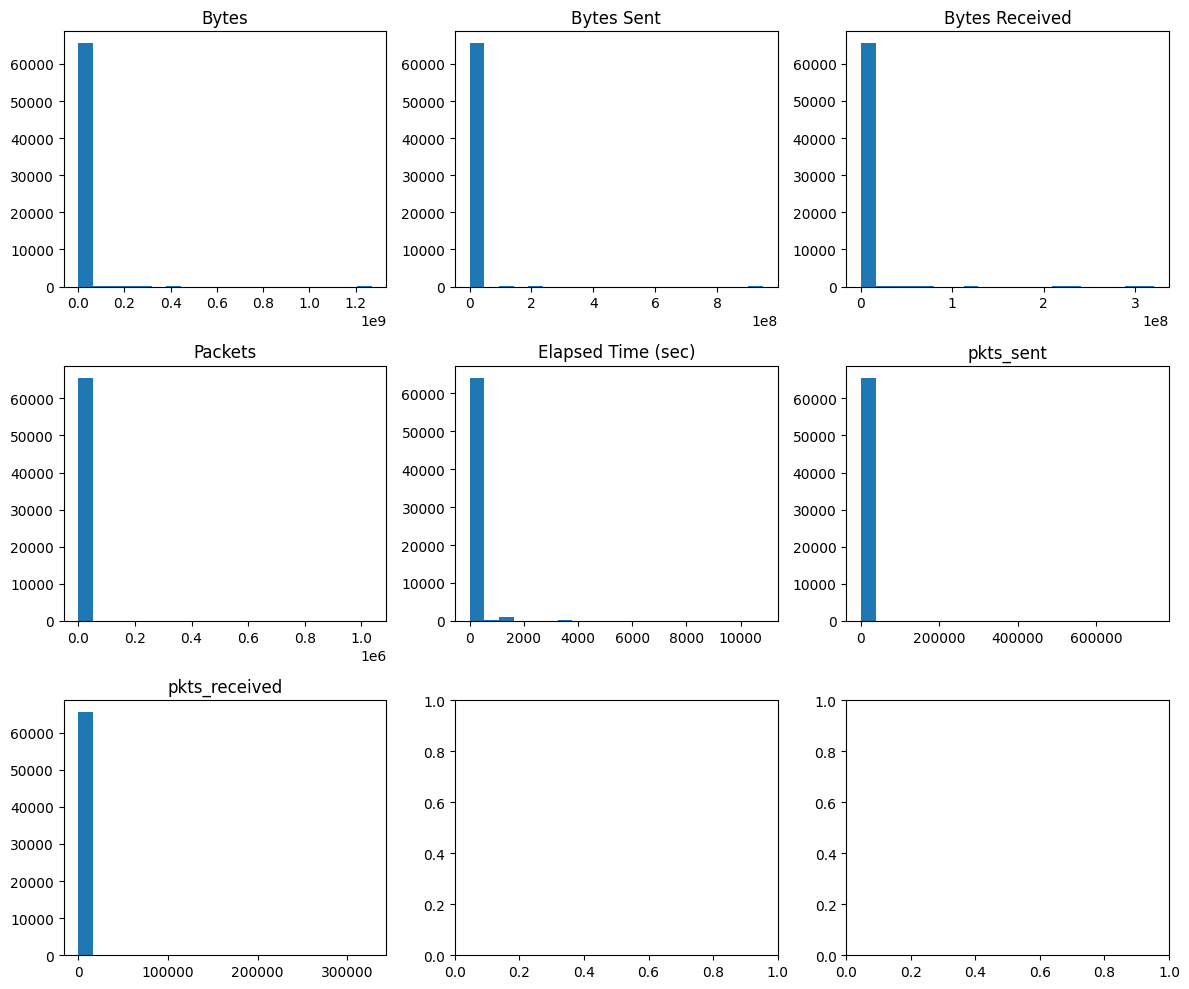

In [9]:
# Select the columns for which you want to create histograms
columns = ['Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']

# Create a figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Create a histogram for each selected column on a separate subplot
for i, col in enumerate(columns):
    axs[i].hist(df[col], bins=20)
    axs[i].set_title(col)

# Adjust the spacing and layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

In [10]:
# Standardize columns on df
scaler = StandardScaler()

# Fit the scaler to the selected columns and transform them
df[columns] = scaler.fit_transform(df[columns])

# Show the standardized DataFrame
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,-0.017255,-0.005823,-0.030308,-0.019651,-0.118474,-0.012551,-0.027197
1,56258,3389,56258,3389,allow,-0.016438,-0.005430,-0.029056,-0.016339,-0.161455,-0.009755,-0.023598
2,6881,50321,43265,50321,allow,-0.017244,-0.005817,-0.030293,-0.019651,3.746507,-0.012551,-0.027197
3,50553,3389,50553,3389,allow,-0.016695,-0.005472,-0.029575,-0.017118,-0.161455,-0.010376,-0.024498
4,50002,443,45848,443,allow,-0.012773,-0.004077,-0.022799,-0.014001,-0.164761,-0.008823,-0.019550


C:\Users\terjr\AppData\Local\Temp\ipykernel_6896\2682889641.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


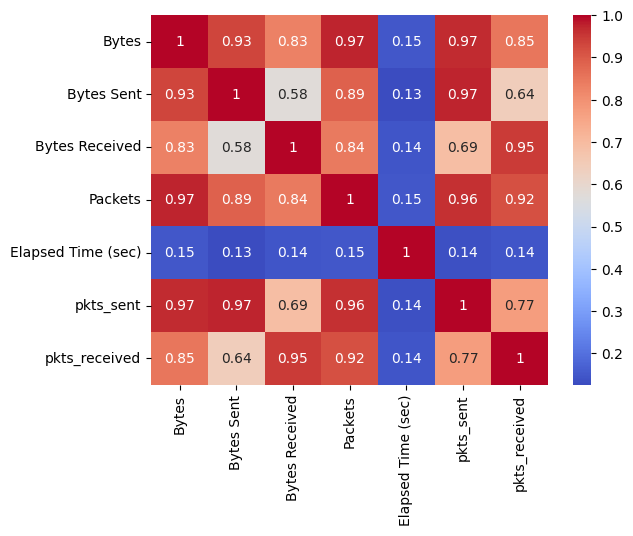

In [11]:
# Compute the correlation coefficients between all pairs of columns
corr_matrix = df.corr()

# Create a heatmap of the correlation coefficients
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [18]:
# x=df.drop('Action', axis=1)
# y=df['Action']

In [19]:
x=df.drop(['Action', 'Bytes Sent', 'Bytes Received', 'pkts_sent', 'pkts_received'], axis=1)
y=df['Action']

In [24]:
# x=df.drop(['Action', 'Elapsed Time (sec)'], axis=1)
# y=df['Action']

In [25]:
x

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,pkts_sent,pkts_received
0,57222,53,54587,53,-0.017255,-0.005823,-0.030308,-0.019651,-0.012551,-0.027197
1,56258,3389,56258,3389,-0.016438,-0.005430,-0.029056,-0.016339,-0.009755,-0.023598
2,6881,50321,43265,50321,-0.017244,-0.005817,-0.030293,-0.019651,-0.012551,-0.027197
3,50553,3389,50553,3389,-0.016695,-0.005472,-0.029575,-0.017118,-0.010376,-0.024498
4,50002,443,45848,443,-0.012773,-0.004077,-0.022799,-0.014001,-0.008823,-0.019550
...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,-0.017231,-0.005798,-0.030293,-0.018871,-0.011619,-0.026747
65528,50964,80,13485,80,0.815823,0.011736,1.842607,0.890740,0.293149,1.632037
65529,54871,445,0,0,-0.017274,-0.005829,-0.030342,-0.019845,-0.012551,-0.027646
65530,54870,445,0,0,-0.017274,-0.005829,-0.030342,-0.019845,-0.012551,-0.027646


In [26]:
treeclassifier=DecisionTreeClassifier()
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.8, test_size=0.2, random_state=50)
treeclassifier.fit(x_train, y_train)
prediction=treeclassifier.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[7525    7    0    1]
 [   3 2935   13    0]
 [   0    6 2604    0]
 [   0    7    0    6]]
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7533
        deny       0.99      0.99      0.99      2951
        drop       1.00      1.00      1.00      2610
  reset-both       0.86      0.46      0.60        13

    accuracy                           1.00     13107
   macro avg       0.96      0.86      0.90     13107
weighted avg       1.00      1.00      1.00     13107

